导入库

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
img = cv2.imread(r"D:\myfile\2022-2023\dcm\classify\train\0\CAI JIN_4.jpg",0)
# 0为采用灰度模式读取图像

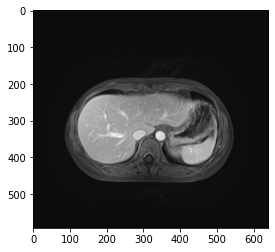

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

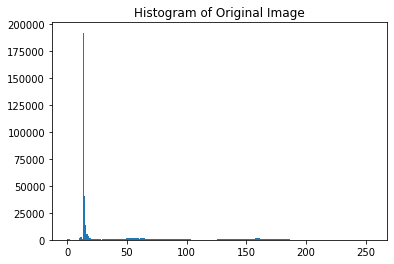

In [4]:
ax = plt.hist(img.ravel(), bins=256)
plt.title("Histogram of Original Image")
plt.show()

直方图均衡

In [14]:
histqequ = cv2.equalizeHist(img)

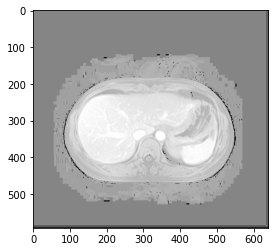

In [15]:
plt.imshow(cv2.cvtColor(histqequ, cv2.COLOR_BGR2RGB))
plt.show()

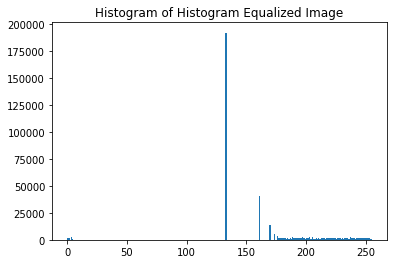

In [16]:
ax = plt.hist(histqequ.ravel(), bins=256)
plt.title("Histogram of Histogram Equalized Image")
plt.show()

CLAHE

In [50]:
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))

In [51]:
out = clahe.apply(img)

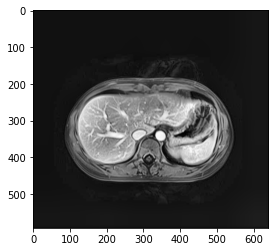

In [52]:
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

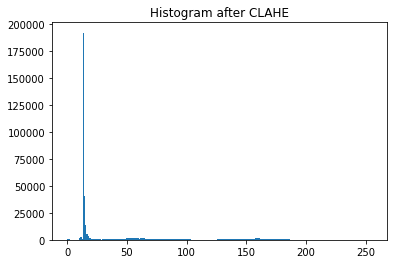

In [53]:
ax = plt.hist(img.ravel(), bins=256)
plt.title("Histogram after CLAHE")
plt.show()

In [54]:
cv2.imwrite(r"D:\myfile\2022-2023\dcm\tupianzengqiang\train\0\CAI JIN_4.jpg",out)

True

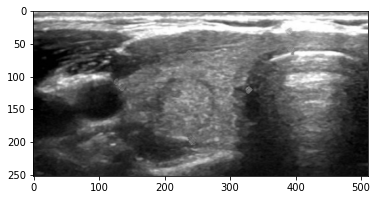

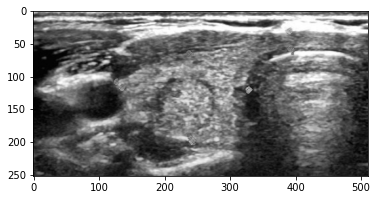

In [8]:
# 合并代码
img = cv2.imread(r"E:\myfile\2022-2023\data_jiazhuangxian\data_afterprocess\img_denoise\1\1.jpg",0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8, 8))
out = clahe.apply(img)
cv2.imwrite(r"E:\myfile\2022-2023\data_jiazhuangxian\data_afterprocess\img_denoise_CLAHE\1\1.jpg",out)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
# 使用1.5
# 图片批处理

dir_orig = r"E:\myfile\2022-2023\data_jiazhuangxian\data_afterprocess\data_aftersplit\val"
dir_toward = r"E:\myfile\2022-2023\data_jiazhuangxian\data_afterprocess\data_aftersplit_CLAHE\val"
sub_dir = ['1', '0']

for sub in sub_dir:
    from_dir = os.path.join(dir_orig, sub)
    to_dir = os.path.join(dir_toward, sub)
    for name in os.listdir(from_dir):
        from_img = os.path.join(from_dir, name)
        to_img = os.path.join(to_dir, name)
        
        img = cv2.imread(from_img,0)
        clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8, 8))
        out = clahe.apply(img)
        cv2.imwrite(to_img,out)

In [15]:
import cv2
import numpy as np

img = np.zeros((200, 200, 3), np.uint8)
# 浅灰色背景
img.fill(200)
img[100:120,100:120,1] = 255
cv2.imshow('img', img)
cv2.waitKey(0)

-1

In [4]:
# 生成新方法图片

dir1 = r"E:\myfile\2022-2023\data_jiazhuangxian\data_afterprocess\data_aftersplit\train"
dir2 = r"E:\myfile\2022-2023\data_jiazhuangxian\data_afterprocess\data_aftersplit_CLAHE\train"
dir3 = r"E:\myfile\2022-2023\data_jiazhuangxian\data_afterprocess\data_aftersplit_newway2\train"
sub_dir = ['1', '0']

for sub in sub_dir:
    sub_dir1 = os.path.join(dir1, sub)
    sub_dir2 = os.path.join(dir2, sub)
    sub_dir3 = os.path.join(dir3, sub)
    for name in os.listdir(sub_dir1):
        img1_dir = os.path.join(sub_dir1, name)
        img2_dir = os.path.join(sub_dir2, name)
        img3_dir = os.path.join(sub_dir3, name)
        
        img1 = cv2.imread(img1_dir,0)
        img2 = cv2.imread(img2_dir,0)
        H = img1.shape[0]
        W = img1.shape[1]
        img3 = np.zeros((H, W, 3), np.uint8)
        img3[:,:,2] = img1
        img3[:,:,1] = img2
        img3[:,:,0] = img2 * 0.2 + img1 * 0.8
        cv2.imwrite(img3_dir, img3)

图像锐化

In [ ]:
# Roberts算子
# 图片批处理

dir_orig = r"E:\myfile\2022-2023\data_jiazhuangxian\data_afterprocess\data_aftersplit\train"
dir_toward = r"E:\myfile\2022-2023\data_jiazhuangxian\data_afterprocess\data_aftersplit_sharpen\train"
sub_dir = ['1', '0']

for sub in sub_dir:
    from_dir = os.path.join(dir_orig, sub)
    to_dir = os.path.join(dir_toward, sub)
    for name in os.listdir(from_dir):
        from_img = os.path.join(from_dir, name)
        to_img = os.path.join(to_dir, name)
        
        img = cv2.imread(from_img,0)
        clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8, 8))
        out = clahe.apply(img)
        cv2.imwrite(to_img,out)

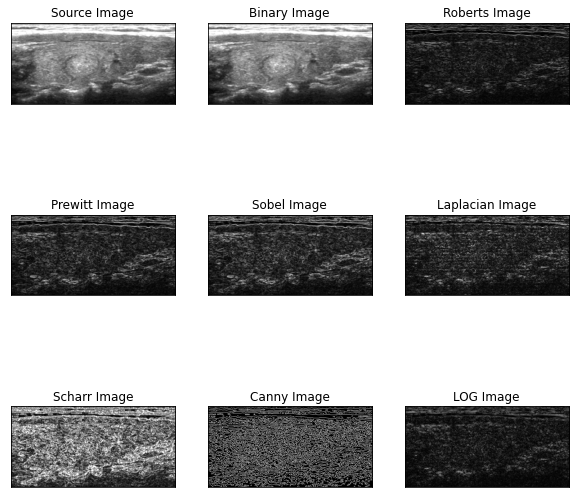

In [2]:
#encoding:utf-8
import cv2  
import numpy as np  
import matplotlib.pyplot as plt
 
#读取图像
img = cv2.imread(r"E:\myfile\2022-2023\data_jiazhuangxian\data_afterprocess\data_aftersplit\val\1\5.jpg",cv2.IMREAD_GRAYSCALE)
lenna_img = img #cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
#灰度化处理图像
grayImage = img #cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
#高斯滤波
gaussianBlur = cv2.GaussianBlur(grayImage, (3,3), 0)
 
#阈值处理
#ret, binary = cv2.threshold(gaussianBlur, 150, 255, cv2.THRESH_BINARY)
#自适应阈值处理
binary = img
 
 
#Roberts算子
kernelx = np.array([[-1,0],[0,1]], dtype=int)
kernely = np.array([[0,-1],[1,0]], dtype=int)
x = cv2.filter2D(binary, cv2.CV_16S, kernelx)
y = cv2.filter2D(binary, cv2.CV_16S, kernely)
absX = cv2.convertScaleAbs(x)     
absY = cv2.convertScaleAbs(y)    
Roberts = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
 
#Prewitt算子
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]], dtype=int)
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]], dtype=int)
x = cv2.filter2D(binary, cv2.CV_16S, kernelx)
y = cv2.filter2D(binary, cv2.CV_16S, kernely)
absX = cv2.convertScaleAbs(x)  
absY = cv2.convertScaleAbs(y)    
Prewitt = cv2.addWeighted(absX,0.5,absY,0.5,0)
 
#Sobel算子
x = cv2.Sobel(binary, cv2.CV_16S, 1, 0)
y = cv2.Sobel(binary, cv2.CV_16S, 0, 1)    
absX = cv2.convertScaleAbs(x)   
absY = cv2.convertScaleAbs(y)    
Sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
 
#拉普拉斯算法
dst = cv2.Laplacian(binary, cv2.CV_16S, ksize = 3)
Laplacian = cv2.convertScaleAbs(dst)
 
# Scharr算子
x = cv2.Scharr(gaussianBlur, cv2.CV_32F, 1, 0) #X方向
y = cv2.Scharr(gaussianBlur, cv2.CV_32F, 0, 1) #Y方向
absX = cv2.convertScaleAbs(x)       
absY = cv2.convertScaleAbs(y)
Scharr = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
 
#Canny算子
Canny = cv2.Canny(gaussianBlur, 20, 30)
 
#先通过高斯滤波降噪
gaussian = cv2.GaussianBlur(grayImage, (3,3), 0)
 
#再通过拉普拉斯算子做边缘检测
dst = cv2.Laplacian(gaussian, cv2.CV_16S, ksize = 3)
LOG = cv2.convertScaleAbs(dst)
 
#效果图
fig = plt.figure(figsize=(10, 10))#设置大小
titles = ['Source Image', 'Binary Image', 'Roberts Image',
          'Prewitt Image','Sobel Image', 'Laplacian Image',
          'Scharr Image', 'Canny Image', 'LOG Image']  
images = [lenna_img, binary, Roberts,
          Prewitt, Sobel, Laplacian,
          Scharr, Canny, LOG]  
for i in np.arange(9):  
   plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()  
fig.savefig('fig-sharp.jpg',bbox_inches='tight')


按坐标裁剪图片

In [17]:
img = cv2.imread(r"C:\Users\54469\Desktop\img\3177.jpg")
print(img.shape)

(228, 443, 3)


In [18]:
w = img.shape[0]
h = img.shape[1]
w_start = (w - 224) // 2
h_start = ((h - 224) // 5) * 1

In [19]:
cropped = img[w_start:w_start+224,h_start:h_start+224]
cv2.imwrite(r"C:\Users\54469\Desktop\img\a\3177.jpg", cropped)

True

处理输出图片--CAM处理

In [2]:
imgname = "564.png"

In [3]:
path = os.path.join(r"C:\Users\54469\Desktop\233", imgname)
img = cv2.imread(path)
print(img.shape)

(480, 640, 3)


In [4]:
path = os.path.join(r"C:\Users\54469\Desktop\233\a", imgname)
cropped = img[58:428,143:513]
cv2.imwrite(path, cropped)

True

In [4]:
imgname = ["564.png", "963.png", "3010.png", "3177.png"]
for n in range(len(imgname)):
    path = os.path.join(r"C:\Users\54469\Desktop\aaa", imgname[n])
    img = cv2.imread(path)
    path = os.path.join(r"C:\Users\54469\Desktop\aaa\a", imgname[n])
    cropped = img[58:428,143:513]
    cv2.imwrite(path, cropped)